In [31]:
# Created by Apex Team (Sardor)
import pandas as pd
import numpy as np 

df = pd.read_csv("IndoorAirQualityMonitoringSystemData_TeamApex.csv", index_col='created_at')
df.shape

(6100, 5)

In [3]:
df.head()

,entry_id,temp,hum,gas,photoresistor
created_at,,,,,
2023-12-07T18:20:40+09:00,1,14.4,53,152,57
2023-12-07T18:21:50+09:00,2,14.5,53,119,48
2023-12-07T18:23:00+09:00,3,14.6,54,112,55
2023-12-07T18:24:09+09:00,4,14.6,52,100,55
2023-12-07T18:25:19+09:00,5,14.5,52,94,53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6100 entries, 2023-12-07T18:20:40+09:00 to 2023-12-12T16:35:08+09:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   entry_id       6100 non-null   int64  
 1   temp           6100 non-null   float64
 2   hum            6100 non-null   int64  
 3   gas            6100 non-null   int64  
 4   photoresistor  6100 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 285.9+ KB


In [5]:
def simulate_data(sensor_name="temp"):
    for i in range(1000):
        col_name = sensor_name + str(i)
        df[col_name] = df[sensor_name].shift(i, fill_value=0.0)
    del df[sensor_name]


for column in ['temp', 'hum', 'gas', 'photoresistor']:
    simulate_data(column);

/var/folders/s7/nr6v1nm5701691g1rwj5bbjw0000gn/T/ipykernel_38033/3202530219.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = df[sensor_name].shift(i, fill_value=0.0)
/var/folders/s7/nr6v1nm5701691g1rwj5bbjw0000gn/T/ipykernel_38033/3202530219.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = df[sensor_name].shift(i, fill_value=0.0)
/var/folders/s7/nr6v1nm5701691g1rwj5bbjw0000gn/T/ipykernel_38033/3202530219.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

In [7]:
df.to_csv("Datat_simulated1000locations.csv")

In [9]:
df.index = pd.to_datetime(df.index)

In [11]:
df['hour'] = df.index.hour
df['day'] = df.index.day

/var/folders/s7/nr6v1nm5701691g1rwj5bbjw0000gn/T/ipykernel_38033/145459397.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hour'] = df.index.hour
/var/folders/s7/nr6v1nm5701691g1rwj5bbjw0000gn/T/ipykernel_38033/145459397.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['day'] = df.index.day


<Axes: xlabel='day'>

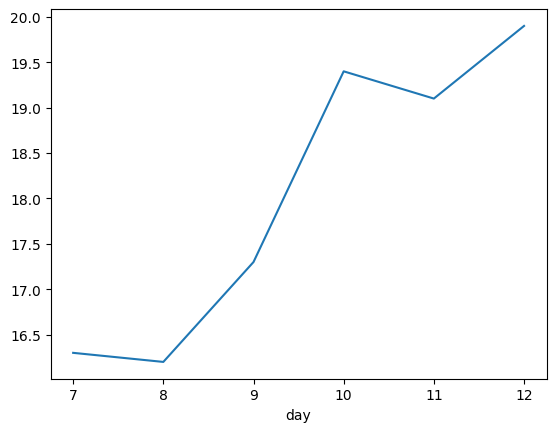

In [30]:
df.groupby('day')['temp0'].max().plot()

<Axes: xlabel='hour'>

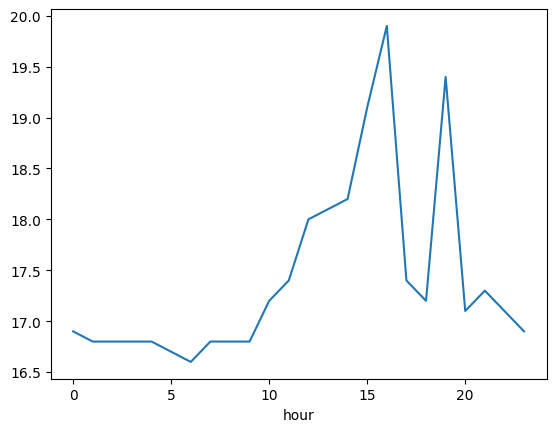

In [29]:
df.groupby('hour')['temp0'].max().plot()